# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [61]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [62]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [63]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [64]:
heart = pd.read_csv("heartdisease.csv")

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [65]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal   sick  
0   0     1  False  
1   0     2  False  
2   0     2  False  
3   0     2  False  
4   0     2  False

In [66]:
heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal  
count  303.000000  
mean     2.313531  
std      0.612277  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [67]:
sample_incomplete_rows = heart[heart.isnull().any(axis=1)].head()

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

The "Sick" feature is not numerical since its output is TRUE/FALSE. We will need to convert that feature to a binary 0/1. There are no null values so we will not have to impute any features. I will create a pipeline that uses StandardScaler and OneHotEncoder on the data.

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [68]:
heart["sick"] = heart["sick"].astype(int) 
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  sick  
0        0   0     1     0  
1        0   0     2     0  
2        2   0     2     0  
3        2   0     2     0  
4        2   0     2     0  
..     ...  ..   ...   ...  
298      1   0     3     1  
299      1   0     3     1  
300      1   2     3     1  
301      1   1     3     1  
302      1   1     2     1  

[303 rows x 14 columns]

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

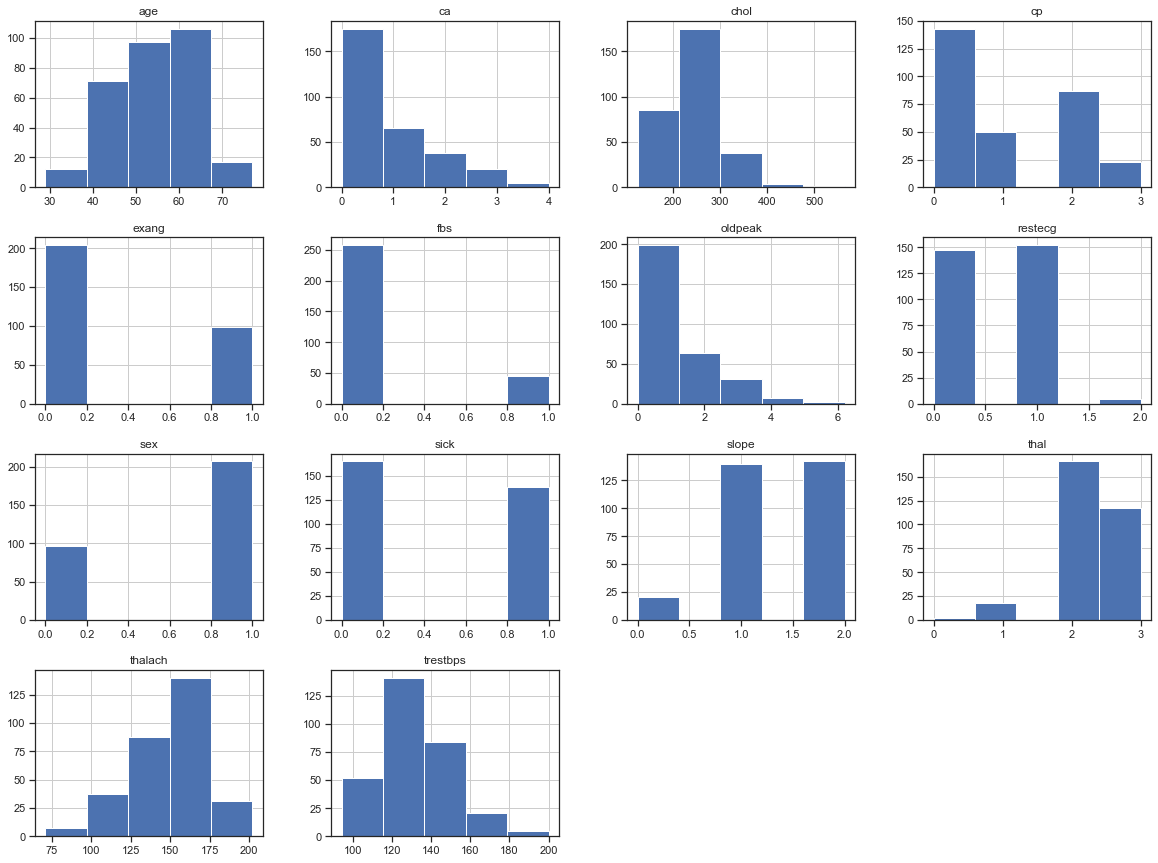

In [69]:
heart.hist(bins=5, figsize=(20,15))
plt.show()

The binary variables are exang, fbs, sex, and sick.

The limited selection variables are restecg, ca, cp, slope, and thal.

The gradient variables are age, oldpeak, chol, trestbps, and thalach.

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

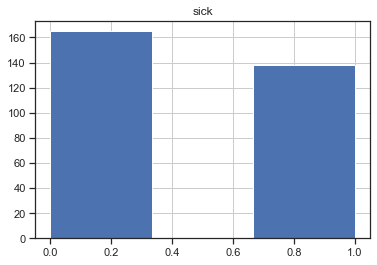

0    165
1    138
Name: sick, dtype: int64

In [70]:
heart["sick"].hist(bins=3)
plt.title("sick")
plt.show()
heart["sick"].value_counts()

The data represents 165 healthy individuals and 138 sick individuals. This is a balanced dataset.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially balancing the dataset by undersampling or oversampling could introduce bias into the data, and it could change the correlation of the features. The reason why the dataset is imbalanced could be valuable to the problem at hand, and balancing the dataset would mess with the frequencies and we could lose that valuable information.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

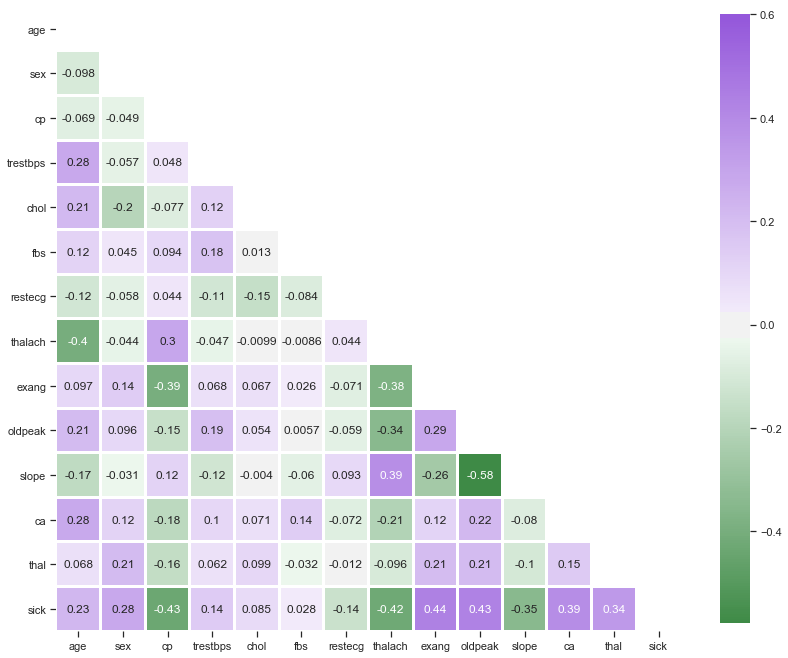

In [71]:
import matplotlib.transforms

sns.set(style="ticks")
corr = heart.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(14,14))
cmap = sns.diverging_palette(130,280,as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.6, center=0, square=True, linewidths=2, cbar_kws={"shrink": .8})

# fix for mpl bug that cuts off top/bottom of seaborn viz
# copied from https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show() # ta-da!

A lot of the variables have a little to no correlation, but there are a few that stand out with a positive or negative correlation. 
Slope and Oldpeak have a stronger negative correlation. These variable have a strong correlation because they both have to do with exercise. Meanwhile, Slope and Cholestoerum have almost no correlation, since the peak exercise and cholestoral are not related. Exang and Chest Pain are negatively correlated as well, as they both have to do with angina.


## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [72]:
heart_y = heart["sick"].copy()
heart_X = heart.drop("sick", axis=1) 

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [73]:
from sklearn.model_selection import train_test_split
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(heart_X, heart_y, test_size=0.3, random_state=42)
print("X_raw_train shape:", X_raw_train.shape)
print("y_raw_train shape:", y_raw_train.shape)
print("X_raw_test shape:", X_raw_test.shape)
print("y_raw_test shape:", y_raw_test.shape)

X_raw_train shape: (212, 13)
y_raw_train shape: (212,)
X_raw_test shape: (91, 13)
y_raw_test shape: (91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

heart_X_dropped = heart_X.drop(["sex", "thal", "restecg", "cp"], axis=1)
numerical_features = list(heart_X_dropped)
categorical_features = ["sex", "thal", "restecg", "cp"]
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(sparse=False), categorical_features)    
])
heart_X_prep = full_pipeline.fit_transform(heart_X)
heart_X_prep

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  0.        ,
         0.        ,  1.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  1.        ,
         0.        ,  0.        ]])

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [75]:
heart_prep_X = np.delete(heart_X_prep, 13, 1)

from sklearn.model_selection import train_test_split
X_pipe_train, X_pipe_test, y_pipe_train, y_pipe_test = train_test_split(heart_prep_X, heart_y, test_size=0.3, random_state=42)
print("X_pipe_train shape:", X_pipe_train.shape)
print("y_pipe_train shape:", y_pipe_train.shape)
print("X_pipe_test shape:", X_pipe_test.shape)
print("y_pipe_test shape:", y_pipe_test.shape)

X_pipe_train shape: (212, 21)
y_pipe_train shape: (212,)
X_pipe_test shape: (91, 21)
y_pipe_test shape: (91,)


The difference between the two training datasets is the shape of the X set. The raw X_train and X_test sets have sizes of (212,13) and (91,13) respectively. The pipelined X_train and X_test sets have sizes of (212,21) and (91,21) respectively. The difference of this shape is a result of applying OneHotEncoder to the data.

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [76]:
from sklearn import svm

clf_raw = svm.SVC(probability = True)
clf_raw.fit(X_raw_train,y_raw_train)

y_raw_pred = clf_raw.predict(X_raw_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy: 0.6483516483516484
Precision: 0.6666666666666666
Recall: 0.43902439024390244
F1 Score: 0.5294117647058824


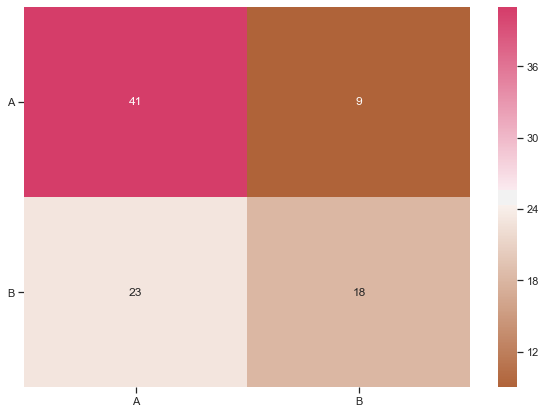

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

acc_raw = accuracy_score(y_raw_test, y_raw_pred)
prec_raw = precision_score(y_raw_test, y_raw_pred)
rec_raw = recall_score(y_raw_test, y_raw_pred)
f1_raw = f1_score(y_raw_test, y_raw_pred)

print("Accuracy:", acc_raw)
print("Precision:", prec_raw)
print("Recall:", rec_raw)
print("F1 Score:", f1_raw)

cm = confusion_matrix(y_raw_test, y_raw_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
cmap = sns.diverging_palette(30,0,as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)

b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.yticks(rotation = 0)
plt.show() 

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

The confusion matrix represents the amount of true positives, false positives, true negatives, and false negatives.

Accuracy measures the percentage of predicted labels that match the true labels. Accuracy is significant because it tells us how many data points were correctly labeled. This is commonly used when the important numbers are true positives and true negatives. This is a good metric for balanced distributions.

Precision measures tp / (tp + fp), where tp is the number of true positives and fp the number of false positives. This measurement is significant because it tells us the classifier's ability to not label a negative data as positive, or how many of the positively labelled points are actually positive. Unlike accuracy, precision is a good metric when the classification is imbalanced.

Recall measures tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. This is important because it tells us the ability to label all the positive values as positive. Like precision, recall is useful with imbalanced distributions. 

F1 measures the weighted average of the precision and recall. F1 = 2 * (precision * recall) / (precision + recall). F1 is significant when the important numbers are false negatives and false positives. When there is an imbalanced class distribution, F1 is a better metric. 

For example, suppose there is a dataset of 100 samples, in which we are trying to predict whether someone is innocent or guilty. Out of the 100, 10 are guilty and 90 are innocent. If the classifier only labels one of the guilty as a guilty, and labels everyone else as innocent, the accuracy will be 0.91. This seems like a very good outcome, but since the dataset is imbalanced, we should look at more than just accuracy. The F1 score in this scenario is 0.18, telling us that this classifier isn't very good. 

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

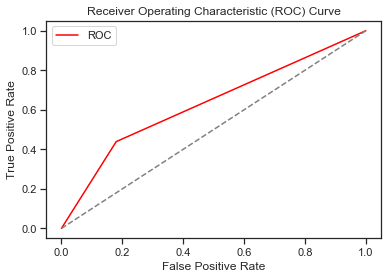

AUC: 0.6295121951219512


In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_raw_test, y_raw_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

The ROC curve is a probability curve that plots the relationship between the false positive rate and the true positive rate. The AUC tells us how well the model can distinguish between classes. The higher the AUC number, the better the model is as labeling positives as positive and negatives as negative. If AUC is 1, the model perfectly distinguishes between the two classes. That is the result we want. When AUC is 0.5, the model has no capability to distinguish the classes. When AUC is 0, the model labels all the positives as negative and all the negatives as positive.

In this model, AUC is 0.63, which means that there is a 63% chance that the model will be able to distinguish between the positive and negative class.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [79]:
from sklearn import svm

clf_pipe = svm.SVC(probability = True)
clf_pipe.fit(X_pipe_train,y_pipe_train)

y_pipe_pred = clf_pipe.predict(X_pipe_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy: 0.8351648351648352
Precision: 0.8421052631578947
Recall: 0.7804878048780488
F1 Score: 0.810126582278481


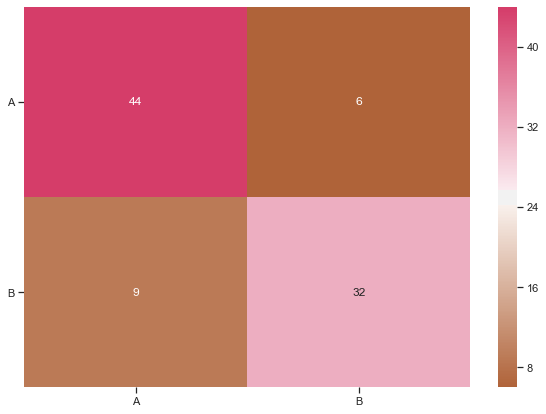

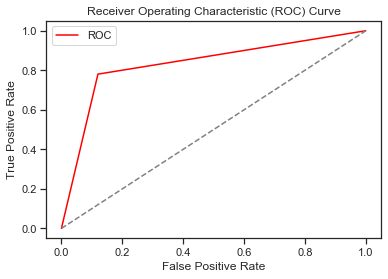

AUC: 0.8302439024390245


In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

acc_pipe = accuracy_score(y_pipe_test, y_pipe_pred)
prec_pipe = precision_score(y_pipe_test, y_pipe_pred)
rec_pipe = recall_score(y_pipe_test, y_pipe_pred)
f1_pipe = f1_score(y_pipe_test, y_pipe_pred)

print("Accuracy:", acc_pipe)
print("Precision:", prec_pipe)
print("Recall:", rec_pipe)
print("F1 Score:", f1_pipe)

cm = confusion_matrix(y_pipe_test, y_pipe_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
cmap = sns.diverging_palette(30,0,as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show() 

fpr, tpr, threshold = metrics.roc_curve(y_pipe_test, y_pipe_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

All the metrics improved with the processed data. I think this is because the data was scaled and one hot encoded. The standard scaler arranges the data in a normal distrubtion. One hot encoding allows the categorical data to be more expressive; it splits the categorical column into many columns, each containing a 0 or 1, depending on which column it is in.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

Accuracy: 0.8131868131868132
Precision: 0.7727272727272727
Recall: 0.8292682926829268
F1 Score: 0.7999999999999999


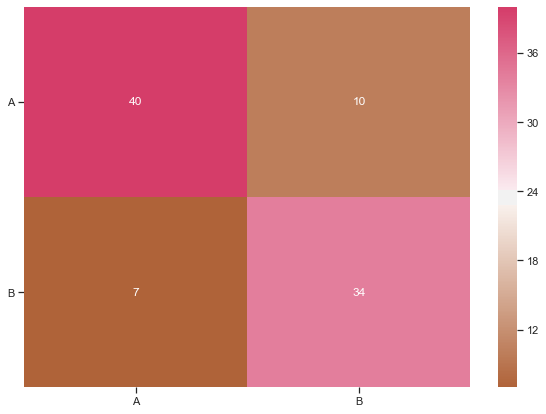

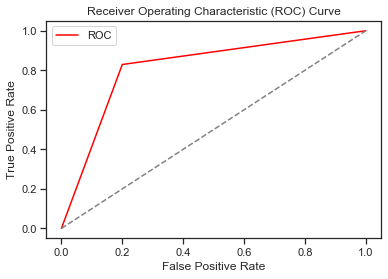

AUC: 0.8146341463414634


In [81]:
clf_pipe_linear = svm.SVC(probability = True, kernel = 'linear')
clf_pipe_linear.fit(X_pipe_train,y_pipe_train)

y_pipe_linear_pred = clf_pipe_linear.predict(X_pipe_test)

acc_pipe_linear = accuracy_score(y_pipe_test, y_pipe_linear_pred)
prec_pipe_linear = precision_score(y_pipe_test, y_pipe_linear_pred)
rec_pipe_linear = recall_score(y_pipe_test, y_pipe_linear_pred)
f1_pipe_linear = f1_score(y_pipe_test, y_pipe_linear_pred)

print("Accuracy:", acc_pipe_linear)
print("Precision:", prec_pipe_linear)
print("Recall:", rec_pipe_linear)
print("F1 Score:", f1_pipe_linear)

cm = confusion_matrix(y_pipe_test, y_pipe_linear_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
cmap = sns.diverging_palette(30,0,as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.show()

fpr, tpr, threshold = metrics.roc_curve(y_pipe_test, y_pipe_linear_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

All of the metrics decreased a little when using linear kernel, but the numbers did not decrease dramatically. The linear kernel is used when the data is linearly separable. The performance of the model decreased because the dataset we used is not linearly separable. 

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

Accuracy: 0.8131868131868132
Precision: 0.7857142857142857
Recall: 0.8048780487804879
F1 Score: 0.7951807228915663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


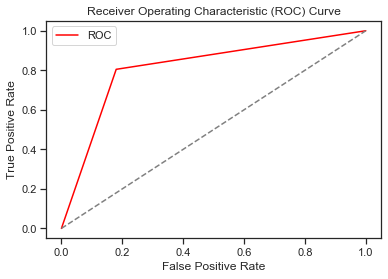

AUC: 0.812439024390244


In [82]:
log_clf = LogisticRegression(solver='sag',max_iter=10).fit(X_pipe_train, y_pipe_train)
y_log_pred = log_clf.predict(X_pipe_test)

acc_log = accuracy_score(y_pipe_test, y_log_pred)
prec_log = precision_score(y_pipe_test, y_log_pred)
rec_log = recall_score(y_pipe_test, y_log_pred)
f1_log = f1_score(y_pipe_test, y_log_pred)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)

fpr, tpr, threshold = metrics.roc_curve(y_pipe_test, y_log_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy: 0.8021978021978022
Precision: 0.7674418604651163
Recall: 0.8048780487804879
F1 Score: 0.7857142857142858


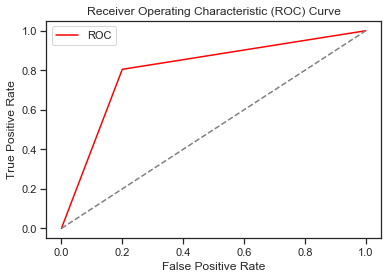

AUC: 0.802439024390244


In [83]:
log_max_clf = LogisticRegression(solver='sag',max_iter=110).fit(X_pipe_train, y_pipe_train)
y_max_log_pred = log_max_clf.predict(X_pipe_test)

acc_max_log = accuracy_score(y_pipe_test, y_max_log_pred)
prec_max_log = precision_score(y_pipe_test, y_max_log_pred)
rec_max_log = recall_score(y_pipe_test, y_max_log_pred)
f1_max_log = f1_score(y_pipe_test, y_max_log_pred)

print("Accuracy:", acc_max_log)
print("Precision:", prec_max_log)
print("Recall:", rec_max_log)
print("F1 Score:", f1_max_log)

fpr_max, tpr_max, threshold = metrics.roc_curve(y_pipe_test, y_max_log_pred)
plt.plot(fpr_max, tpr_max, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc_max = np.trapz(tpr_max,fpr_max)
print('AUC:', auc_max)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

Changing max_iter to 110 fixed the problem. This did not improve the outcome; the outcome is exactly the same as before. I think this is because although the model did not converge at 10 iterations, it still reached peak performance. Therefore, there is no change in the metrics after 10 iterations.

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

Accuracy: 0.8021978021978022
Precision: 0.7674418604651163
Recall: 0.8048780487804879
F1 Score: 0.7857142857142858


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


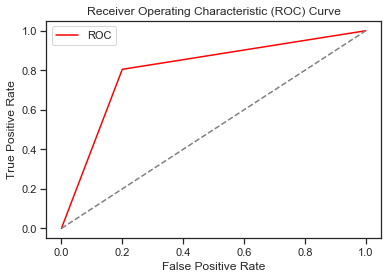

AUC: 0.802439024390244


In [84]:
log_pen_clf = LogisticRegression(solver='sag',penalty='none').fit(X_pipe_train, y_pipe_train)
y_log_pen_pred = log_pen_clf.predict(X_pipe_test)

acc_pen_log = accuracy_score(y_pipe_test, y_log_pen_pred)
prec_pen_log = precision_score(y_pipe_test, y_log_pen_pred)
rec_pen_log = recall_score(y_pipe_test, y_log_pen_pred)
f1_pen_log = f1_score(y_pipe_test, y_log_pen_pred)

print("Accuracy:", acc_pen_log)
print("Precision:", prec_pen_log)
print("Recall:", rec_pen_log)
print("F1 Score:", f1_pen_log)

fpr, tpr, threshold = metrics.roc_curve(y_pipe_test, y_log_pen_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)


### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

Setting the penalty to none removes the regularization term from the loss function. Solver sag is a variation of stochastic gradient that is used for large datasets with lots of features, like this one.

This combination did not change the outcome at all. This may be because the test data largely aligns with the training day and the model tends towards linear solutions.

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

SVM finds the decision boundary that has the same distance from all the boundary points on both sides of the line and it uses the perceptron algorithm. Logistic regression finds the boundary using the sigmoid function and minimizing the Log Loss function.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [85]:
knn_clf = KNeighborsClassifier().fit(X_pipe_train, y_pipe_train)
y_knn_pred = knn_clf.predict(X_pipe_test)

acc_knn = accuracy_score(y_pipe_test, y_knn_pred)
print("Accuracy:", acc_knn)

Accuracy: 0.7802197802197802


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [86]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

homogen = homogeneity_score(y_pipe_test, y_knn_pred)
complete = completeness_score(y_pipe_test, y_knn_pred)
vmeasure = v_measure_score(y_pipe_test, y_knn_pred)
adj_rand = adjusted_rand_score(y_pipe_test, y_knn_pred)
adj_mutual = adjusted_mutual_info_score(y_pipe_test, y_knn_pred)

print("Homogeneity Score:", homogen)
print("Completeness Score:", complete)
print("V-Measure Score:", vmeasure)
print("Adjusted Rand Score:", adj_rand)
print("Adjusted Mutual Info Score:", adj_mutual)

Homogeneity Score: 0.24398180883616719
Completeness Score: 0.2422786074815696
V-Measure Score: 0.2431272252974664
Adjusted Rand Score: 0.30646200085873765
Adjusted Mutual Info Score: 0.23611961399184944


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

Homogeneity refers to whether or not a cluster contains data points of a single class. Since this model gives a homoegeneity score of 0.24, it is in the lower side, meaning that the clusters contain quite a few datapoints from different classes.

Completeness refers to whether or not all the data points of the same class are in the same cluster. A completeness score of 0.24 is low, so this model placed data points of the same class into different clusters.

V-Measure is the harmonic mean of homogeneity and completeness, so it tells us how well homoegeneity and completeness are satisfied. Since the model gave a score of 0.24 for both homogeneity and completeness, the V-Measure score is also 0.24.

Adjusted Rand score is the adjusted Rand Index. The Rand Index is the similarity measure between two clusterings. When the clusterings are the same, ARI is 1. When it is random labeling, ARI is closer to 0. In this model, ARI is 0.30, which is on the lower end. This means that the model tends towards random labeling.

Adjusted Mutual Info score is the adjusted Mutual Information score. Mutual Informatoin is a measurement of the similarity between two labels of the same data. AMI is 0 when the two distributions are random, and 1 when two distributions are identical. An AMI score of 0.23 tells us that the distributions are more random.


As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [87]:
neighbors = [1, 2, 3, 5, 10, 20, 50, 100]
for n in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=n).fit(X_pipe_train, y_pipe_train)
    knn_pred = knn_classifier.predict(X_pipe_test)
    print("N = %d" %n)
    print("Accuracy:", accuracy_score(y_pipe_test, knn_pred))
    print("Homogeneity Score:", homogeneity_score(y_pipe_test, knn_pred))
    print("Completeness Score:", completeness_score(y_pipe_test, knn_pred))
    print("V-Measure Score:", v_measure_score(y_pipe_test, knn_pred))
    print("Adjusted Rand Score:", adjusted_rand_score(y_pipe_test, knn_pred))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(y_pipe_test, knn_pred))
    print("\n") 

N = 1
Accuracy: 0.7582417582417582
Homogeneity Score: 0.20985098431317886
Completeness Score: 0.20853140645344054
V-Measure Score: 0.20918911440934143
Adjusted Rand Score: 0.2585989950396032
Adjusted Mutual Info Score: 0.20209343235457478


N = 2
Accuracy: 0.7802197802197802
Homogeneity Score: 0.23587152006192993
Completeness Score: 0.24364920233631138
V-Measure Score: 0.2396972853624199
Adjusted Rand Score: 0.30650749259089194
Adjusted Mutual Info Score: 0.22960800117394892


N = 3
Accuracy: 0.7802197802197802
Homogeneity Score: 0.24398180883616719
Completeness Score: 0.2422786074815696
V-Measure Score: 0.2431272252974664
Adjusted Rand Score: 0.30646200085873765
Adjusted Mutual Info Score: 0.23611961399184944


N = 5
Accuracy: 0.7802197802197802
Homogeneity Score: 0.24398180883616719
Completeness Score: 0.2422786074815696
V-Measure Score: 0.2431272252974664
Adjusted Rand Score: 0.30646200085873765
Adjusted Mutual Info Score: 0.23611961399184944


N = 10
Accuracy: 0.8241758241758241
Ho

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

N = 50 gave the best results, with an accuracy of 0.835 and a V-Measure score of 0.35. This is because looking at more neighbors makes the decision surface smoother. However, having too high of N (like N=100) includes more bias, so that performance decreased.

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

It seems like KNN is more effective with smaller datasets and datasets without outliers. We got better results with the classification metrics than we did with clustering metrics. Classification is supervised learning, when the labels are predefined. Clustering is unsupervised learning, in which data is grouped based on similar features. Since our dataset had predefined labels, we'd expect better results from supervised learning, and therefore classification.